# WeDiscover - Technical Assessment - Alejandro Chamorro
------------------------------------

# Structure:

#### 1) Data cleaning:
    
- Inspecting variables   
    


#### 2) Test 1:

- Interesting metrics
    
- Duration

- Alternative duration



#### 3) Test 2:

- Duration

# 1. Data cleaning

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('..')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

### Read .jason file

In [2]:
data = pd.read_json('../Data/test_data.json')
data.head(3)

,date,campaign_id,ad_group_id,ad_id,labels,cost,impressions,clicks,registrations,enquiries,purchases
0,date,campaign_id,ad_group_id,ad_id,labels,cost,impressions,clicks,registrations,enquiries,purchases
1,2020-09-06,100001,200001,300001,"[""mvt_id:91,var_id:type_1""]",£20.68,1821,12,2.68,0.98,0.18
2,2020-09-07,100001,200001,300001,"[""mvt_id:91,var_id:type_1""]",£17.41,2297,10,1.72,0.46,0.20


In [3]:
data = data.iloc[1:]
data.tail(3)

,date,campaign_id,ad_group_id,ad_id,labels,cost,impressions,clicks,registrations,enquiries,purchases
3039,2020-10-14,100076,200076,300076,"[""mvt_id:91,var_id:type_2""]",£18.71,1643,16,1.31,0.69,0.25
3040,2020-10-15,100076,200076,300076,"[""mvt_id:91,var_id:type_2""]",£23.76,2078,16,1.00,0.53,0.15
3041,2020-09-14,100026,200026,300026,"[""mvt_id:91,var_id:type_1""]",£10.24,1924,7,1.35,0.23,0.09


In [4]:
data = data.iloc[:-1]
data.head(3)

,date,campaign_id,ad_group_id,ad_id,labels,cost,impressions,clicks,registrations,enquiries,purchases
1,2020-09-06,100001,200001,300001,"[""mvt_id:91,var_id:type_1""]",£20.68,1821,12,2.68,0.98,0.18
2,2020-09-07,100001,200001,300001,"[""mvt_id:91,var_id:type_1""]",£17.41,2297,10,1.72,0.46,0.20
3,2020-09-08,100001,200001,300001,"[""mvt_id:91,var_id:type_1""]",£13.02,1551,7,1.12,0.50,0.15


### Check for null values

In [5]:
data.isnull().sum()

date             0
campaign_id      0
ad_group_id      0
ad_id            0
labels           0
cost             0
impressions      0
clicks           0
registrations    0
enquiries        0
purchases        0
dtype: int64

## a) Inspecting variables

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 1 to 3040
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           3040 non-null   object
 1   campaign_id    3040 non-null   object
 2   ad_group_id    3040 non-null   object
 3   ad_id          3040 non-null   object
 4   labels         3040 non-null   object
 5   cost           3040 non-null   object
 6   impressions    3040 non-null   object
 7   clicks         3040 non-null   object
 8   registrations  3040 non-null   object
 9   enquiries      3040 non-null   object
 10  purchases      3040 non-null   object
dtypes: object(11)
memory usage: 261.4+ KB


In [7]:
data.date.value_counts()

2020-09-07    76
2020-09-10    76
2020-09-27    76
2020-10-05    76
2020-09-09    76
2020-10-02    76
2020-09-13    76
2020-10-12    76
2020-09-17    76
2020-10-15    76
2020-09-12    76
2020-09-20    76
2020-09-18    76
2020-09-06    76
2020-09-21    76
2020-09-24    76
2020-10-07    76
2020-09-08    76
2020-10-08    76
2020-09-30    76
2020-09-11    76
2020-09-16    76
2020-09-22    76
2020-10-13    76
2020-10-06    76
2020-09-28    76
2020-10-04    76
2020-09-26    76
2020-10-09    76
2020-09-14    76
2020-09-19    76
2020-10-03    76
2020-10-11    76
2020-10-14    76
2020-09-25    76
2020-10-10    76
2020-09-29    76
2020-10-01    76
2020-09-15    76
2020-09-23    75
44097          1
Name: date, dtype: int64

In [8]:
data = data.copy()
data.date = data.copy().date.replace({'44097':'2020-09-23'}) # Found conversion to date on Excel

In [9]:
data = data.copy()
data.date = pd.to_datetime(data.date)

<AxesSubplot:>

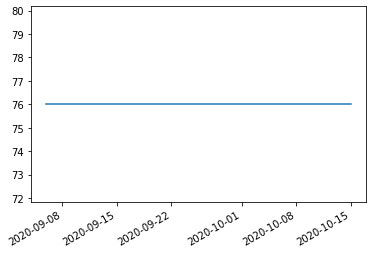

In [10]:
data.date.value_counts().plot()

In [11]:
data = data.copy()
data.campaign_id = data.campaign_id.astype(int)

<AxesSubplot:>

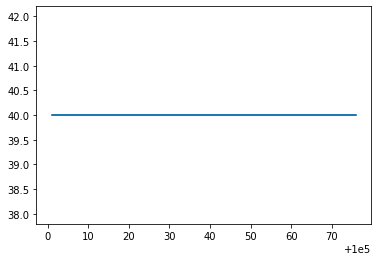

In [12]:
data.campaign_id.value_counts().plot()

In [13]:
data = data.copy()
data.ad_group_id = data.ad_group_id.astype(int)

<AxesSubplot:>

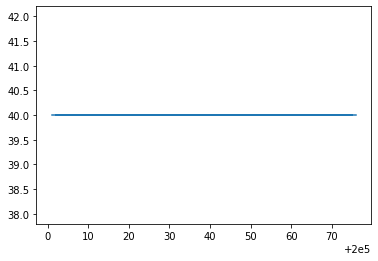

In [14]:
data.ad_group_id.value_counts().plot()

In [15]:
data = data.copy()
data.ad_id = data.ad_id.astype(int)

<AxesSubplot:>

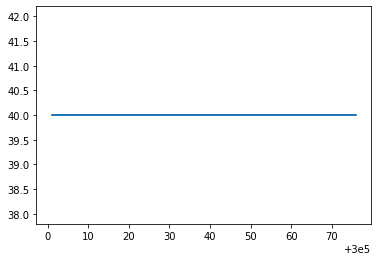

In [16]:
data.ad_id.value_counts().plot()

In [17]:
data.labels.value_counts()

["mvt_id:91,var_id:type_1"]    1800
["mvt_id:91,var_id:type_2"]    1240
Name: labels, dtype: int64

In [18]:
data.labels = data.labels.replace('["mvt_id:91,var_id:type_1"]', 'A')
data.labels = data.labels.replace('["mvt_id:91,var_id:type_2"]', 'B')

In [19]:
data = data.copy()
data.cost = data.cost.str.replace('£', '')

In [20]:
data.head(3)

,date,campaign_id,ad_group_id,ad_id,labels,cost,impressions,clicks,registrations,enquiries,purchases
1,2020-09-06,100001,200001,300001,A,20.68,1821,12,2.68,0.98,0.18
2,2020-09-07,100001,200001,300001,A,17.41,2297,10,1.72,0.46,0.20
3,2020-09-08,100001,200001,300001,A,13.02,1551,7,1.12,0.50,0.15


In [21]:
data = data.copy()
data.cost = data.cost.astype(float)

In [22]:
data.cost.replace(to_replace='£', value='', inplace=True)

<AxesSubplot:>

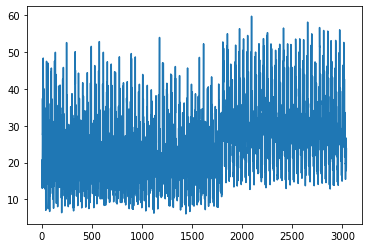

In [23]:
data.cost.plot()

In [24]:
data.dtypes

date             datetime64[ns]
campaign_id               int32
ad_group_id               int32
ad_id                     int32
labels                   object
cost                    float64
impressions              object
clicks                   object
registrations            object
enquiries                object
purchases                object
dtype: object

In [25]:
for col in data.columns[-3:]:
    data[col] = data[col].astype(float)

In [26]:
for col in data.columns[-5:-3]:
    data[col] = data[col].astype(int)

In [27]:
data.dtypes

date             datetime64[ns]
campaign_id               int32
ad_group_id               int32
ad_id                     int32
labels                   object
cost                    float64
impressions               int32
clicks                    int32
registrations           float64
enquiries               float64
purchases               float64
dtype: object

In [28]:
data.head(3)

,date,campaign_id,ad_group_id,ad_id,labels,cost,impressions,clicks,registrations,enquiries,purchases
1,2020-09-06,100001,200001,300001,A,20.68,1821,12,2.68,0.98,0.18
2,2020-09-07,100001,200001,300001,A,17.41,2297,10,1.72,0.46,0.20
3,2020-09-08,100001,200001,300001,A,13.02,1551,7,1.12,0.50,0.15


In [29]:
data_a = data[data.labels=='A'].copy().reset_index()
data_a

,index,date,campaign_id,ad_group_id,ad_id,labels,cost,impressions,clicks,registrations,enquiries,purchases
0,1,2020-09-06,100001,200001,300001,A,20.68,1821,12,2.68,0.98,0.18
1,2,2020-09-07,100001,200001,300001,A,17.41,2297,10,1.72,0.46,0.20
2,3,2020-09-08,100001,200001,300001,A,13.02,1551,7,1.12,0.50,0.15
3,4,2020-09-09,100001,200001,300001,A,17.07,1398,10,1.33,0.75,0.18
4,5,2020-09-10,100001,200001,300001,A,23.90,2754,14,2.39,0.97,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...
1795,1796,2020-10-11,100045,200045,300045,A,11.43,1551,9,0.80,0.63,0.12
1796,1797,2020-10-12,100045,200045,300045,A,12.68,1679,8,1.20,0.43,0.15
1797,1798,2020-10-13,100045,200045,300045,A,11.51,1225,6,0.69,0.53,0.07
1798,1799,2020-10-14,100045,200045,300045,A,13.83,1842,9,0.67,0.90,0.20


In [30]:
data_b = data[data.labels=='B'].copy().reset_index()
data_b

,index,date,campaign_id,ad_group_id,ad_id,labels,cost,impressions,clicks,registrations,enquiries,purchases
0,1801,2020-09-06,100046,200046,300046,B,33.72,2313,27,2.87,1.92,0.44
1,1802,2020-09-07,100046,200046,300046,B,26.17,4543,23,1.91,1.19,0.29
2,1803,2020-09-08,100046,200046,300046,B,28.72,3134,19,2.96,1.37,0.30
3,1804,2020-09-09,100046,200046,300046,B,40.59,4188,26,3.95,1.89,0.35
4,1805,2020-09-10,100046,200046,300046,B,40.70,4748,31,4.32,1.16,0.37
...,...,...,...,...,...,...,...,...,...,...,...,...
1235,3036,2020-10-11,100076,200076,300076,B,17.90,2975,13,1.97,1.09,0.10
1236,3037,2020-10-12,100076,200076,300076,B,19.49,2566,13,1.17,0.35,0.14
1237,3038,2020-10-13,100076,200076,300076,B,17.79,1977,13,1.82,0.34,0.09
1238,3039,2020-10-14,100076,200076,300076,B,18.71,1643,16,1.31,0.69,0.25


# 2. Test 1
## a) Interesting metrics

### Hypothesis testing

H0: Metric(A) == Metric(B)

H1: Metric(A) != Metric(B)

≈

### Example: CTR

H0: CTR(A) == CTR(B)

H1: CTR(A) != CTR(B)


In [31]:
# Create a function that returns all the info we want to include from each metric.

def metric_info (numerator, denominator):
    x_control = data[data.labels=='A'][numerator].sum()
    n_control = data[data.labels=='A'][denominator].sum()
    x_experiment = data[data.labels=='B'][numerator].sum()
    n_experiment = data[data.labels=='B'][denominator].sum()
    pooled_prob = (x_control+x_experiment)/(n_control+n_experiment)
    pooled_se = (   pooled_prob*(1-pooled_prob)*(1/n_control+1/n_experiment)   )**0.5
    prob_control = x_control/n_control
    prob_experiment = x_experiment/n_experiment
    prob_difference = prob_experiment - prob_control
    prob_increase = prob_experiment/prob_control-1
    margin_error = pooled_se*1.96
    diff_ci_plus_95 = round(0+margin_error, 5)
    diff_ci_minus_95 = round(0-margin_error, 5)
    if (prob_difference>diff_ci_plus_95) or (prob_difference<diff_ci_minus_95):
        return [str(numerator)+'/'+str(denominator), prob_control, prob_experiment, prob_increase, prob_difference, round(pooled_se,4), diff_ci_minus_95, diff_ci_plus_95, 'Yes']
    else:
        return [str(numerator)+'/'+str(denominator), prob_control, prob_experiment, prob_increase, prob_difference, round(pooled_se,4), diff_ci_minus_95, diff_ci_plus_95, 'No']

### Most interesting business metrics:

1) CTR

2) Registrations/Clicks

3) Enquiries/Registrations

4) Purchases/Enquiries

5) Purchases/Clicks

6) Purchases/Impressions

In [32]:
# metric_info('clicks','impressions')
# metric_info('registrations','clicks')
# metric_info('enquiries','registrations')
# metric_info('purchases','enquiries')
# metric_info('purchases','clicks')
# metric_info('purchases','impressions')

In [33]:
list_1 = ['clicks','impressions', 'registrations','clicks', 'enquiries','registrations', 'purchases','enquiries', 'purchases', 'clicks', 'purchases','impressions']
titles = ['Metric', 'A', 'B', 'Increase', 'Difference', 'Pooled SE', 'CI (-95%)', 'CI (+95%)', 'Significant']

In [34]:
# List results for desired metrics
lists = []
for n in range(0,11,2):
    lists.append(metric_info(list_1[n], list_1[(n+1)]))

# Transpose information to create a dataframe
lists_2 = [[],[],[],[],[],[],[],[],[]]
for n in range(9):
    for lis in lists:
        lists_2[n].append(lis[n])

In [35]:
dict_1 = {}
for n in range(9):
    dict_1[str(titles[n])]=lists_2[n]

In [36]:
table_1 = pd.DataFrame(data=dict_1)
table_1.head(10)

,Metric,A,B,Increase,Difference,Pooled SE,CI (-95%),CI (+95%),Significant
0,clicks/impressions,0.005640,0.005835,0.034595,0.000195,0.0001,-0.00010,0.00010,Yes
1,registrations/clicks,0.117936,0.115678,-0.019151,-0.002259,0.0029,-0.00561,0.00561,No
2,enquiries/registrations,0.506273,0.468591,-0.074430,-0.037682,0.0130,-0.02553,0.02553,Yes
3,purchases/enquiries,0.233634,0.211599,-0.094314,-0.022035,0.0155,-0.03042,0.03042,No
4,purchases/clicks,0.013950,0.011470,-0.177777,-0.002480,0.0010,-0.00195,0.00195,Yes
5,purchases/impressions,0.000079,0.000067,-0.149332,-0.000012,0.0000,-0.00001,0.00001,Yes


#### Export this information to Excel

From Excel it is easier to create nicely formatted tables.

### Cost-related metrics:

1) Impressions

2) Clicks

3) Registrations

4) Enquiries

5) Purchases

In [37]:
def cost (col):
    cost_a = data[data.labels=='A'].cost.sum()/data[data.labels=='A'][col].sum()
    cost_b = data[data.labels=='B'].cost.sum()/data[data.labels=='B'][col].sum()
    
    return ['Cost per ' +str(col[:-1]), cost_a, cost_b]

In [38]:
cost('impressions')

['Cost per impression', 0.009147590070510962, 0.008225119270444546]

In [39]:
cost('clicks')

['Cost per click', 1.6218787777031565, 1.409559757829434]

In [40]:
cost('registrations')

['Cost per registration', 13.752180830050076, 12.185248602720254]

In [41]:
cost('enquiries')

['Cost per enquirie', 27.16357347730724, 26.004012603159065]

In [42]:
cost('purchases')

['Cost per purchase', 116.26539086477702, 122.89270470170409]

#### Export this information to Excel

From Excel it is easier to create nicely formatted tables.

### Structure of A vs B

In [43]:
data_a.groupby('campaign_id').sum().shape[0]

45

In [44]:
data_b.groupby('campaign_id').sum().shape[0]

31

In [45]:
data_a.groupby('ad_group_id').sum().shape[0]

45

In [46]:
data_b.groupby('ad_group_id').sum().shape[0]

31

In [47]:
data_a.groupby('ad_id').sum().shape[0]

45

### Other metrics:
Let's obtain the necessary information to compare the funnel proportion of each branch.

In [48]:
impressions_a = data_a.impressions.sum()
clicks_a = data_a.clicks.sum()
reg_a = data_a.registrations.sum()
enq_a = data_a.enquiries.sum()
pur_a = data_a.purchases.sum()

totals_a = pd.Series([impressions_a, clicks_a, reg_a, enq_a, pur_a])
totals_a

0    4224024.00
1      23824.00
2       2809.71
3       1422.48
4        332.34
dtype: float64

In [49]:
impressions_b = data_b.impressions.sum()
clicks_b = data_b.clicks.sum()
reg_b = data_b.registrations.sum()
enq_b = data_b.enquiries.sum()
pur_b = data_b.purchases.sum()

totals_b = pd.Series([impressions_b, clicks_b, reg_b, enq_b, pur_b])
totals_b

0    4585587.00
1      26758.00
2       3095.30
3       1450.43
4        306.91
dtype: float64

#### Export this information to Excel

From Excel it is easier to create nicely formatted tables.

### Plot trends in the data

In [50]:
dates_1 = data_a.groupby('date').mean().reset_index()['date']

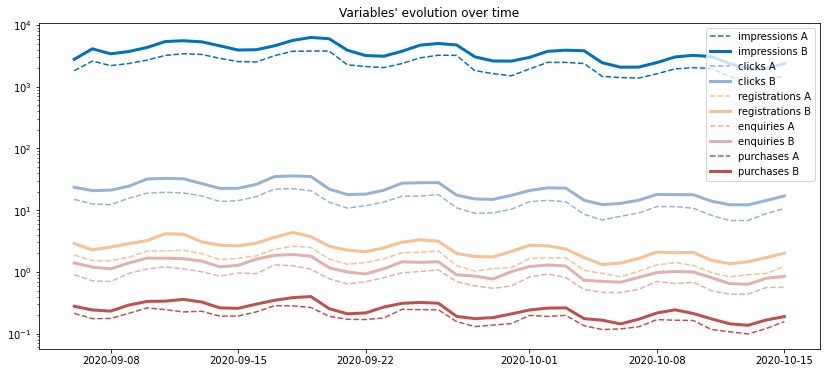

In [51]:
plt.figure(figsize=(14,6))
plt.yscale('log')
plt.title("Variables' evolution over time")

plt.plot(dates_1, data_a.groupby('date').mean().impressions, label='impressions A', color='#0070C0', linestyle='dashed')
plt.plot(dates_1, data_b.groupby('date').mean().impressions, label='impressions B', color='#0070C0', linewidth=3)

plt.plot(dates_1, data_a.groupby('date').mean().clicks, label='clicks A', color='#95B3D7', linestyle='dashed')
plt.plot(dates_1, data_b.groupby('date').mean().clicks, label='clicks B', color='#95B3D7', linewidth=3)

plt.plot(dates_1, data_a.groupby('date').mean().registrations, label='registrations A', color='#FAC090', linestyle='dashed')
plt.plot(dates_1, data_b.groupby('date').mean().registrations, label='registrations B', color='#FAC090', linewidth=3)

plt.plot(dates_1, data_a.groupby('date').mean().enquiries, label='enquiries A', color='#E3B0AF', linestyle='dashed')
plt.plot(dates_1, data_b.groupby('date').mean().enquiries, label='enquiries B', color='#E3B0AF', linewidth=3)

plt.plot(dates_1, data_a.groupby('date').mean().purchases, label='purchases A', color='#C0504D', linestyle='dashed')
plt.plot(dates_1, data_b.groupby('date').mean().purchases, label='purchases B', color='#C0504D', linewidth=3)

plt.legend()
plt.show()

## b) Duration

Disregarding the time from click to lower funnel conversions, determine the earliest date that you could have declared a winner. If there is no winner, how much longer would the test have needed to run for?

#### Calculate minimum sample size

Based on:

- Baseline CTR (0.57%)
- Minimum detectable change - relative to the baseline (3.5%)
- Level of confidence (95%)
- Power (80%)

https://www.evanmiller.org/ab-testing/sample-size.html

Result - Minimum sample size (per branch): 2,246,990

In [52]:
ctr_a = data_a.clicks.sum()/data_a.impressions.sum()
ctr_b = data_b.clicks.sum()/data_b.impressions.sum()

In [53]:
ctr_increase = ctr_b/ctr_a-1
ctr_increase

0.0345950794979879

In [54]:
total_sample = 2246990*2
total_sample

4493980

In [55]:
days = max(data.date)-min(data.date)
days

Timedelta('39 days 00:00:00')

In [56]:
daily_impressions = data.impressions.sum()/39
daily_impressions

225887.46153846153

In [57]:
exp_duration = total_sample/daily_impressions
exp_duration

19.894774014425835

## c) Alternative duration


In [58]:
i_to_p_a = data_a.purchases.sum()/data_a.impressions.sum()
i_to_p_a

7.867853023562367e-05

In [59]:
i_to_p_b = data_b.purchases.sum()/data_b.impressions.sum()
i_to_p_b

6.692927208664887e-05

In [60]:
i_to_p_increase = i_to_p_b/i_to_p_a-1
i_to_p_increase

-0.14933245592906397

#### Calculate minimum sample size

Based on:

- Baseline Purchases/Impressions (0.008%)
- Minimum detectable change - relative to the baseline (15%)
- Level of confidence (95%)
- Power (80%)

https://www.evanmiller.org/ab-testing/sample-size.html

Result - Minimum sample size (per branch): 8,914,251

In [61]:
min_ss = 8914251*2
min_ss

17828502

In [62]:
daily_imp = data.impressions.sum()/39
daily_imp

225887.46153846153

In [63]:
exp_duration_2 = min_ss/daily_imp
exp_duration_2

78.92647904657765

# 2. Test 2
## a) Duration
The client wants to run another test, this time comparing different audiences for campaign targeting. 

Based on the daily volumes observed in this test, calculate how long they would need to run the audience test for if they wanted to detect a 5% increase in the rate of registered users enquiring.

In [64]:
baseline_r_to_e = data.enquiries.sum()/data.registrations.sum()
baseline_r_to_e

0.48652076795805593

In [65]:
days = max(data.date)-min(data.date)
days

Timedelta('39 days 00:00:00')

In [66]:
daily_reg = data.registrations.sum()/39
daily_reg

151.41051282051282

#### Calculate sample size

Based on:

- Baseline Enquiries/Registrations (49%)
- Minimum detectable change - relative to the baseline (5%)
- Level of confidence (95%)
- Power (80%)

https://www.evanmiller.org/ab-testing/sample-size.html#!48;80;5;5;1

Result - Minimum sample size (per branch): 6.535 

In [67]:
branch_min_sample_size = 6535

In [68]:
total_min_sample_size = branch_min_sample_size*2

In [69]:
exp_duration_3 = total_min_sample_size/daily_reg
exp_duration_3

86.32161503536827